In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("./datasets/weatherHistory.csv")
df

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,0.89,14.1197,251,15.8263,0,1015.13
1,9.355556,0.86,14.2646,259,15.8263,0,1015.63
2,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,8.288889,0.83,14.1036,269,15.8263,0,1016.41
4,8.755556,0.83,11.0446,259,15.8263,0,1016.51
...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31,16.1000,0,1014.36
96449,24.583333,0.48,10.0947,20,15.5526,0,1015.16
96450,22.038889,0.56,8.9838,30,16.1000,0,1015.66
96451,21.522222,0.60,10.5294,20,16.1000,0,1015.95


In [4]:
selected_features = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']
selected_features

['Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)']

In [5]:
X = np.asarray(df[selected_features], dtype=np.float32)
y = np.asarray(df['Temperature (C)'], dtype=np.float32).reshape(-1, 1)

In [6]:
X

array([[8.90000e-01, 1.41197e+01, 2.51000e+02, 1.58263e+01, 0.00000e+00,
        1.01513e+03],
       [8.60000e-01, 1.42646e+01, 2.59000e+02, 1.58263e+01, 0.00000e+00,
        1.01563e+03],
       [8.90000e-01, 3.92840e+00, 2.04000e+02, 1.49569e+01, 0.00000e+00,
        1.01594e+03],
       ...,
       [5.60000e-01, 8.98380e+00, 3.00000e+01, 1.61000e+01, 0.00000e+00,
        1.01566e+03],
       [6.00000e-01, 1.05294e+01, 2.00000e+01, 1.61000e+01, 0.00000e+00,
        1.01595e+03],
       [6.10000e-01, 5.87650e+00, 3.90000e+01, 1.55204e+01, 0.00000e+00,
        1.01616e+03]], dtype=float32)

In [7]:
y

array([[ 9.472222],
       [ 9.355556],
       [ 9.377778],
       ...,
       [22.038889],
       [21.522223],
       [20.438889]], dtype=float32)

In [9]:
steps = [
  ('scaling', StandardScaler()),
  ('svr', SVR(kernel='linear'))
]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
svr_model = Pipeline(steps=steps)
svr_model.fit(X_train, y_train)

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaling', StandardScaler()), ('svr', SVR(kernel='linear'))])

In [12]:
svr_model.score(X_train, y_train)

0.4452328627431221

In [13]:
svr_model.score(X_test, y_test)

0.44201263654256584

In [14]:
predicted_y = svr_model.predict(X)

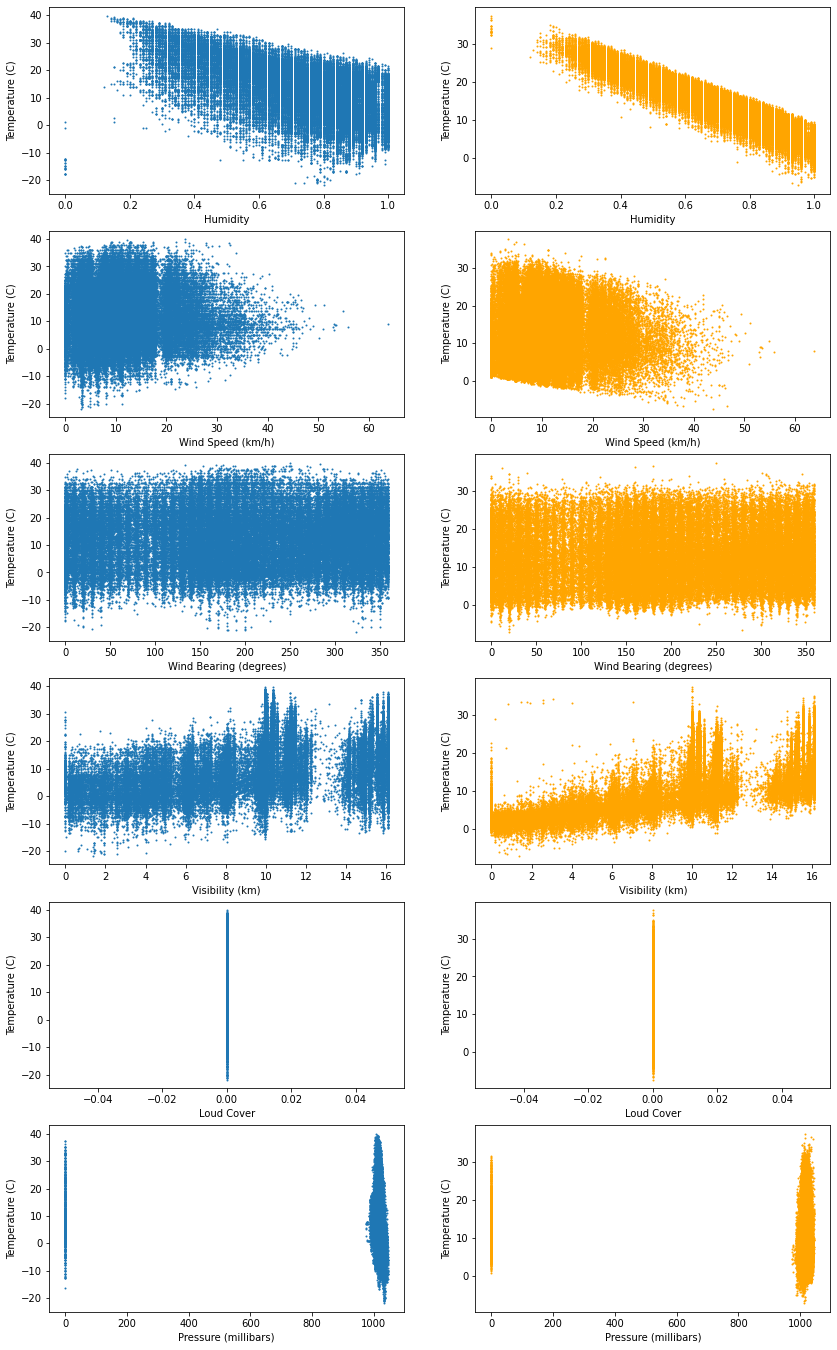

In [15]:
fig, axs = plt.subplots(6, 2)
fig.set_figwidth(14)
fig.set_figheight(24)
fig.set_facecolor("white")
j = 0

for i in selected_features:
  axs[j,0].scatter(df[i], df['Temperature (C)'], s=1)
  axs[j,0].set(xlabel= i, ylabel = 'Temperature (C)')
  axs[j,1].scatter(df[i], predicted_y, color='orange', s=1)
  axs[j,1].set(xlabel= i, ylabel = 'Temperature (C)')
  
  j += 1

plt.show()